<a href="https://colab.research.google.com/github/chaitykundu/Diabetes_Prediction/blob/main/Copy_of_dtree_Diabates_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Baisc packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#SK learn packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Metrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import plot_roc_curve

In [2]:
# data set read
file = 'diabetes.csv'
df = pd.read_csv(file,delimiter=",")
raw = df.copy()
df.head()
df.shape

(768, 9)

In [3]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#calculate the average age of everyone in the column
df['Age'].mean()

np.float64(33.240885416666664)

In [7]:
#showing the first 5 rows from dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Feature selection
X = df.iloc[:,0:-1] # feature set
#y = df.iloc[:,-1]
y = df['Outcome'] #Target column


In [9]:
#Train test splitting= 20% data for testing purpose
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.2, random_state=4)
X_train.shape

(614, 8)

In [10]:
#Model building
dtree = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=6, min_samples_split= 2, random_state=2)

In [12]:
#Fitting the model for given dataset
fit_dtree = dtree.fit(X_train,y_train)
pred_dtree = fit_dtree.predict(X_test)

In [13]:
pred_dtree

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [14]:
#Accuracy
acc = accuracy_score(y_test,pred_dtree)
print(acc)

0.7792207792207793


In [15]:
#Confusion tree
cm_dtree = confusion_matrix(y_test,pred_dtree)
cm_dtree

array([[88, 14],
       [20, 32]])

In [16]:
#Classification report
cr = classification_report(y_test,pred_dtree)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       102
           1       0.70      0.62      0.65        52

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.78       154



In [17]:
f1_score(y_test,pred_dtree)

0.6530612244897959

In [18]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_dtree)
roc_auc = auc(false_positive_rate, true_positive_rate)

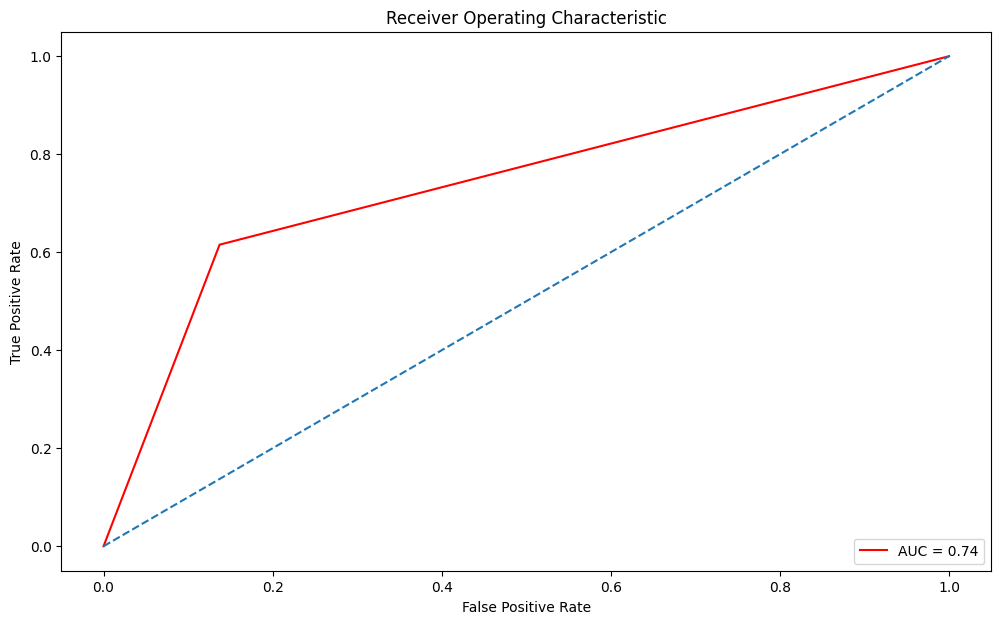

In [19]:
plt.figure(figsize=(12,7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate') #ROC
plt.show()